In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../')

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import os
from os.path import join as pjoin


from esn_lib.esn import *
from esn_lib.hubesn import *

In [2]:
params = {
    'lr': 0.5,
    'p2': 0.2,
    'r_sig': 0.1,
    'n_size': 500,
    'spec_rad': 0.9,
    'in_features': 1,
    'in_scale': 1,
    'activation': 'tanh',
    'input_neurons': 'hub',
    'hub_type': 'mix',
    'use_skip': False,
    'verbose': False,
    'lambda_dc': 0.5,
    'lambda_sc': 0.5,
    'exp_coef': 2,
}

In [3]:
EXPTPATH = '../results/contour_cv_mod'
lambda_list = np.round(np.linspace(0, 1, 61), 2)
exp_coef_list = np.round(np.linspace(0.25, 5, 20), 2)
np.save(pjoin(EXPTPATH, 'lambda_list.npy'), lambda_list)
np.save(pjoin(EXPTPATH, 'exp_coef_list.npy'), exp_coef_list)

In [61]:
def iterate_lambda_exp(params, lambda_list, exp_coef_list):
    cv, mod = [], []
    for lambda_dc in lambda_list:
        for exp_coef in exp_coef_list:
            pm = params.copy()
            pm['lambda_dc'] = lambda_dc
            pm['lambda_sc'] = 1 - lambda_dc
            pm['exp_coef'] = exp_coef
            hubesn = HubESN(**pm)
            cv.append(hubesn.get_heterogeneity())
            mod.append(hubesn.get_modularity())

    cv = np.array(cv).reshape(len(lambda_list), len(exp_coef_list))
    mod = np.array(mod).reshape(len(lambda_list), len(exp_coef_list))
    return cv, mod
            
            
cv, mod = iterate_lambda_exp(params, lambda_list, exp_coef_list)

In [62]:
np.save(pjoin(EXPTPATH, 'cv.npy'), cv)
np.save(pjoin(EXPTPATH, 'mod.npy'), mod)

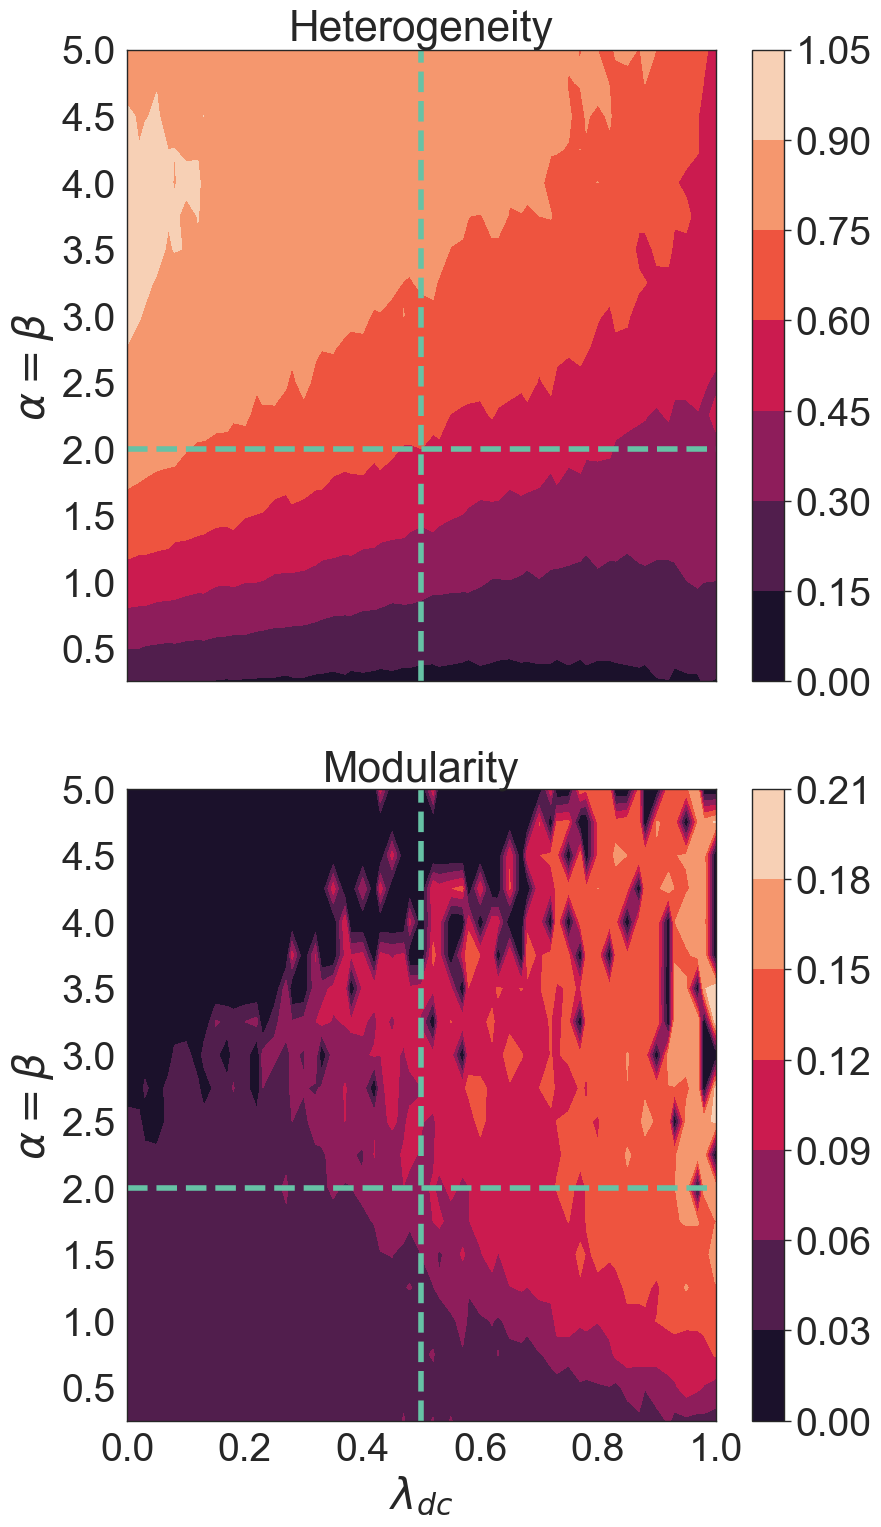

In [96]:
PLTPATH = '../plots/topology'

sns.set_style('white')
sns.set_context('paper', font_scale=3.2)
colors = sns.color_palette('Set2')
idx=0
lw=4

fig, ax = plt.subplots(2, 1, figsize=(9.5, 16), sharex=True)
fig.colorbar(ax[0].contourf(lambda_list, exp_coef_list, cv.T), ax=ax[0])
ax[0].axhline(y=2, color=colors[idx], linestyle='--', lw=lw)
ax[0].axvline(x=0.5, color=colors[idx], linestyle='--', lw=lw)
ax[0].set_yticks(np.arange(0.5, 5.5, 0.5))
ax[0].set_ylabel(r'$\alpha=\beta$')
ax[0].set_title('Heterogeneity')

fig.colorbar(ax[1].contourf(lambda_list, exp_coef_list, mod.T), ax=ax[1])
ax[1].axhline(y=2, color=colors[idx], linestyle='--', lw=lw)
ax[1].axvline(x=0.5, color=colors[idx], linestyle='--', lw=lw)
ax[1].set_yticks(np.arange(0.5, 5.5, 0.5))
ax[1].set_xlabel(r'$\lambda_{dc}$')
ax[1].set_ylabel(r'$\alpha=\beta$')
ax[1].set_title('Modularity')
plt.tight_layout()
plt.savefig(pjoin(PLTPATH, 'contour_cv_mod.png'), dpi=300)
plt.show()

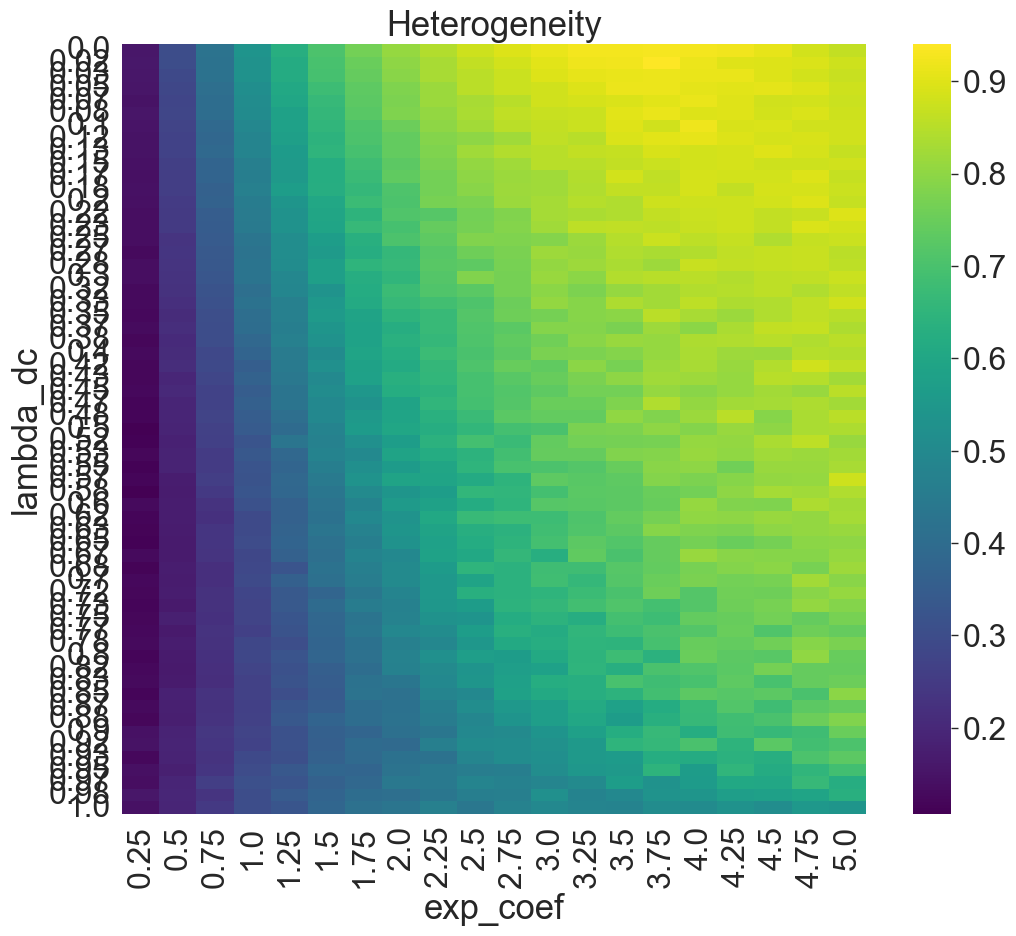

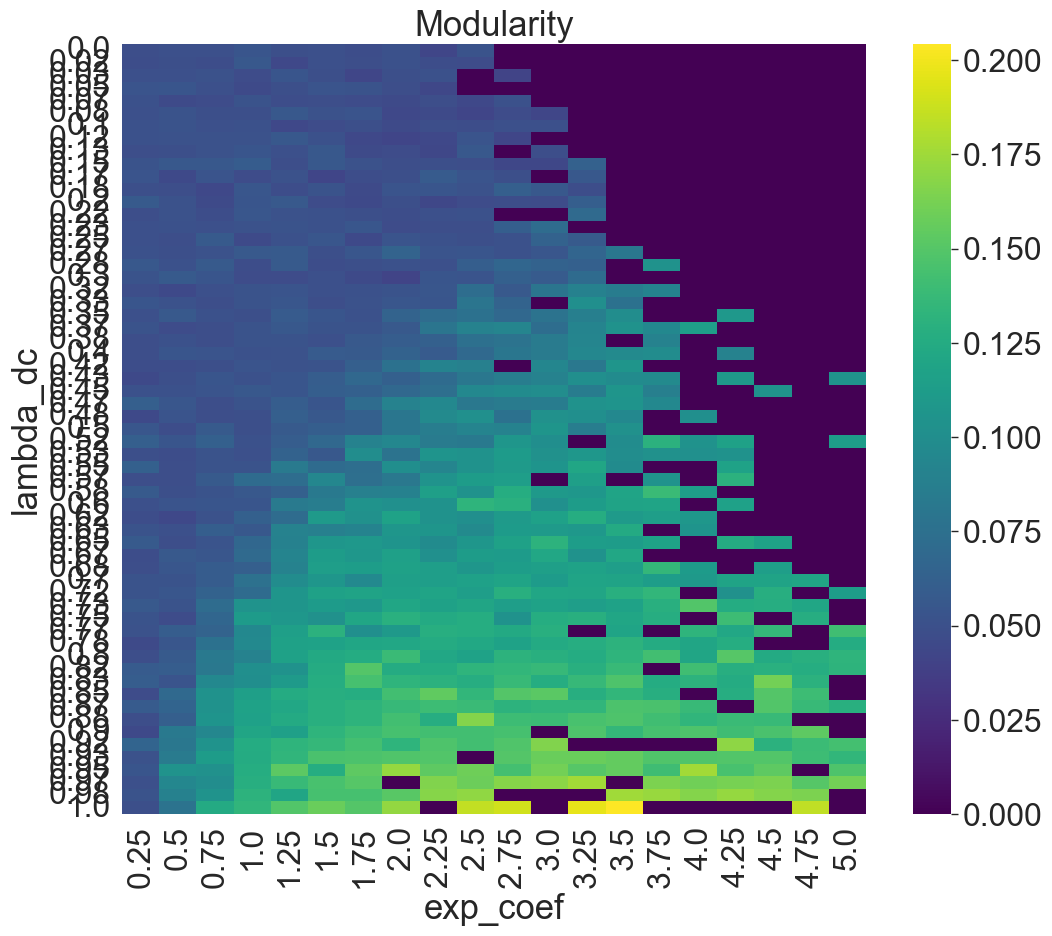

In [63]:
sns.set_style('white')
sns.set_context('paper', font_scale=2.6)
colors = sns.color_palette('Set2')
idx=0

plt.figure(figsize=(12, 10))
sns.heatmap(cv, cmap='viridis', xticklabels=exp_coef_list, yticklabels=lambda_list)
plt.xlabel('exp_coef')
plt.ylabel('lambda_dc')
plt.title('Heterogeneity')
# plt.savefig(pjoin(EXPTPATH, 'heterogeneity.png'))
plt.show()

plt.figure(figsize=(12, 10))
sns.heatmap(mod, cmap='viridis', xticklabels=exp_coef_list, yticklabels=lambda_list)
plt.xlabel('exp_coef')
plt.ylabel('lambda_dc')
plt.title('Modularity')
# plt.savefig(pjoin(EXPTPATH, 'modularity.png'))
plt.show()

In [119]:
hubesn = HubESN(**params)
# print(hubesn.get_avg_path_length())
print(hubesn.get_clustering_coefficient())

0.035245211699289965


In [120]:
esn = ESN(**params)
# print(esn.get_avg_path_length())
print(esn.get_clustering_coefficient())

0.014377988151262372


In [174]:
EXPTPATH = '../results/clustering_coef'
lambda_list = np.round(np.linspace(0, 1, 11), 1)
spar_list = np.array([0.1, 0.2, 0.3, 0.4, 0.5])
np.save(pjoin(EXPTPATH, 'lambda_list.npy'), lambda_list)
np.save(pjoin(EXPTPATH, 'spar_list.npy'), spar_list)

In [125]:
params = {
    'lr': 0.5,
    'p2': 0.2,
    'r_sig': 0.1,
    'n_size': 500,
    'spec_rad': 0.9,
    'in_features': 1,
    'in_scale': 1,
    'activation': 'tanh',
    'input_neurons': 'hub',
    'hub_type': 'mix',
    'use_skip': False,
    'verbose': False,
    'lambda_dc': 0.5,
    'lambda_sc': 0.5,
    'exp_coef': 2,
}
def iterate_lambda_cc(params, lambda_list):
    cc_esn, cc_hub = [], []
    for lambda_dc in lambda_list:
        pm = params.copy()
        pm['lambda_dc'] = lambda_dc
        pm['lambda_sc'] = 1 - lambda_dc
        hubesn = HubESN(**pm)
        cc_hub.append(hubesn.get_clustering_coefficient())
        esn = ESN(**pm)
        cc_esn.append(esn.get_clustering_coefficient())
    return cc_esn, cc_hub

def iterate_spar_cc(params, spar_list):
    for spar in spar_list:
        pm = params.copy()
        pm['spar'] = spar
        cc_esn, cc_hub = iterate_lambda_cc(pm, lambda_list)
        np.save(pjoin(EXPTPATH, 'cc_esn_spar_{}.npy'.format(spar)), cc_esn)
        np.save(pjoin(EXPTPATH, 'cc_hub_spar_{}.npy'.format(spar)), cc_hub)

iterate_spar_cc(params, spar_list)

In [126]:
cc_esn, cc_hub = [], []
spar_list = np.load(pjoin(EXPTPATH, 'spar_list.npy'))
for spar in spar_list:
    cc_esn.append(np.load(pjoin(EXPTPATH, 'cc_esn_spar_{}.npy'.format(spar))))
    cc_hub.append(np.load(pjoin(EXPTPATH, 'cc_hub_spar_{}.npy'.format(spar))))
cc_esn = np.array(cc_esn)
cc_hub = np.array(cc_hub)

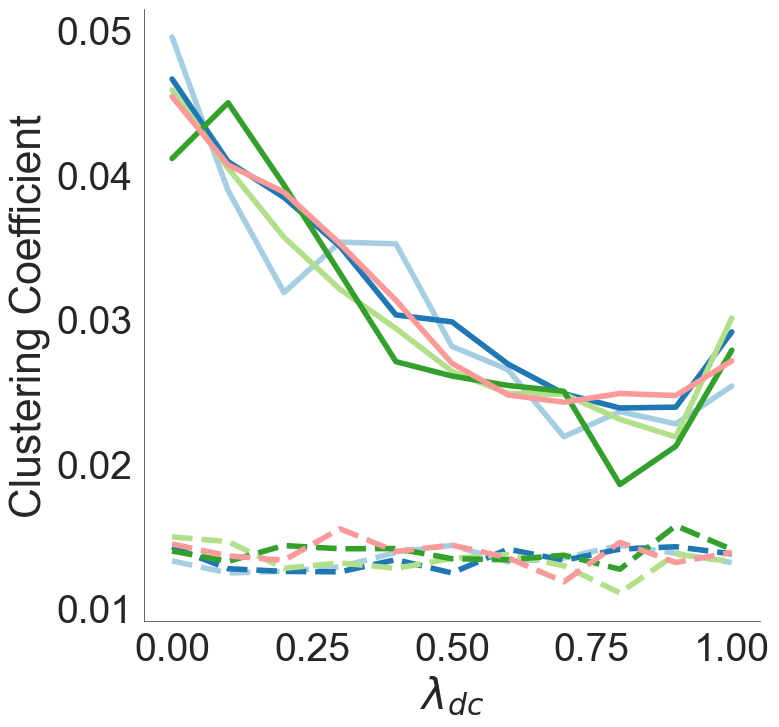

In [231]:
# plot settings
cs = 2 # capsize
ew = 3 # errorbar width
lw = 4 # linewidth
al = 1 # alpha
plot_error = False
font_size = 25
font_scale = 3.2

# plot
# bold all text
sns.set_color_codes("bright")
sns.set_context("paper", font_scale=font_scale)
colors = sns.color_palette("Paired")

fig, ax = plt.subplots(figsize=(8.5, 8))
if plot_error:
    for i in range(len(spar_list)):
        ax.errorbar(lambda_list, cc_esn[i], yerr=cc_esn[i] - cc_esn[i], color=colors[i], linestyle='--', lw=lw, capsize=cs, alpha=alp)
        ax.errorbar(lambda_list, cc_hub[i], yerr=cc_hub[i] - cc_hub[i], color=colors[i], linestyle='-', lw=lw, capsize=cs, alpha=alp)
else:
    for i in range(len(spar_list)):
        ax.plot(lambda_list, cc_esn[i], color=colors[i], linestyle='--', lw=lw, alpha=al)
        ax.plot(lambda_list, cc_hub[i], color=colors[i], linestyle='-', lw=lw, alpha=al)

ax.set_xlabel(r'$\lambda_{dc}$', weight='bold')
ax.set_ylabel(r'Clustering Coefficient')
# ax.set_title('Clustering Coefficient')
# make a legend
# ax.plot([], [], color='k', linestyle='--', lw=3, label='ESN')
# ax.plot([], [], color='k', linestyle='-', lw=3, label='HubESN')
# ax.legend()
# remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(0.5)
ax.spines['bottom'].set_linewidth(0.5)
plt.tight_layout()
plt.savefig(pjoin(PLTPATH, 'cc.png'), dpi=300)

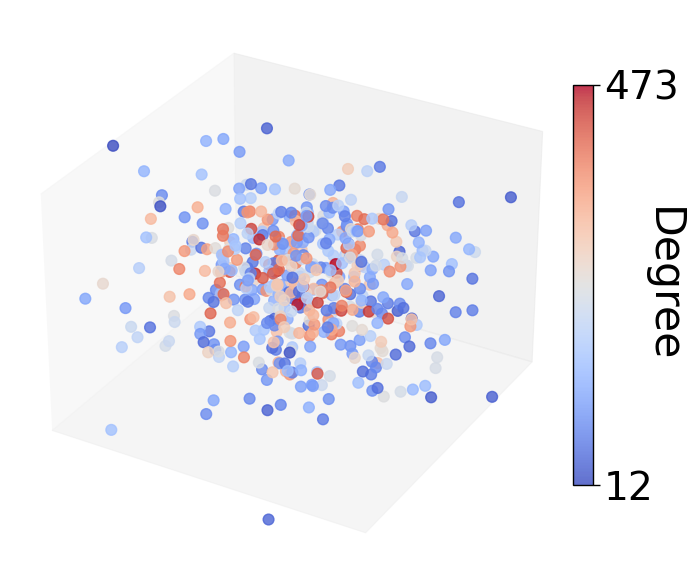

In [4]:
params = {
    'lr': 0.5,
    'p2': 0.2,
    'r_sig': 0.1,
    'n_size': 500,
    'spec_rad': 0.9,
    'in_features': 1,
    'in_scale': 1,
    'activation': 'tanh',
    'input_neurons': 'hub',
    'hub_type': 'mix',
    'use_skip': False,
    'verbose': False,
    'lambda_dc': 0.5,
    'lambda_sc': 0.5,
    'exp_coef': 2,
}
hubesn = HubESN(**params)
x = hubesn.x
y = hubesn.y
z = hubesn.z

deg = hubesn.get_degrees(norm = False)

sns.set_context("paper", font_scale=3.2)
fig, ax = plt.subplots(figsize=(9, 8), subplot_kw={'projection': '3d'})
cbar = fig.colorbar(ax.scatter(x, y, z, linewidth=1, alpha=0.8, cmap='coolwarm', c=deg, s=60))
cbar.set_label('Degree', rotation=270)
cbar.ax.set_position([0.75, 0.25, 0.05, 0.5])
cbar.ax.set_yticks([deg.min(), deg.max()])
cbar.ax.set_yticklabels([deg.min(), deg.max()])
# plot a cube
# remove all background
# ax.xaxis.pane.fill = False
# ax.yaxis.pane.fill = False
# ax.zaxis.pane.fill = False
# keep grid but remove ticks
# set title to the bottom
# ax.set_title('Spatial Distribution', y=-0.05)
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
r = 2.5
ax.set_xlim(-r, r)
ax.set_ylim(-r, r)
ax.set_zlim(-r, r)
ax.xaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
# plt.tight_layout()
plt.show()